# Analysis

1. People in Urban areas utilize ride sharing more than other areas. 67.5%
    of the ride sharing happens in urban areas. 
2. There are more drivers in Urban Areas at almost 78%
2. The Average fare in Rural areas are higher than in Urban areas mainly due to the number of rides.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Take in all of our wrestling data and read it into pandas
city_data = "raw_data/city_data.csv"
ride_data = "raw_data/ride_data.csv"

city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)
print(len(city_df))
print(len(ride_df))

126
2375


In [3]:
ride_per_city_df = ride_df.groupby('city').fare.agg(['count','mean','sum'])
ride_per_city_df = ride_per_city_df.reset_index()

print(city_df.head())
print(ride_per_city_df.head())

             city  driver_count   type
0      Kelseyland            63  Urban
1      Nguyenbury             8  Urban
2    East Douglas            12  Urban
3   West Dawnfurt            34  Urban
4  Rodriguezburgh            52  Urban
           city  count       mean     sum
0  Alvarezhaven     31  23.928710  741.79
1    Alyssaberg     26  20.609615  535.85
2    Anitamouth      9  37.315556  335.84
3  Antoniomouth     22  23.625000  519.75
4  Aprilchester     19  21.981579  417.65


In [4]:
city_ride_df = pd.merge(ride_per_city_df, city_df, how='left', on='city')
city_ride_df.head()

,city,count,mean,sum,driver_count,type
0,Alvarezhaven,31,23.928710,741.79,21,Urban
1,Alyssaberg,26,20.609615,535.85,67,Urban
2,Anitamouth,9,37.315556,335.84,16,Suburban
3,Antoniomouth,22,23.625000,519.75,21,Urban
4,Aprilchester,19,21.981579,417.65,49,Urban


## Bubble Plot

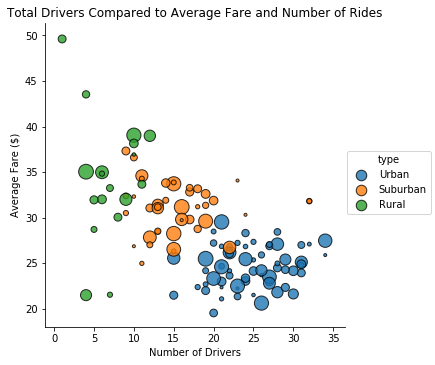

In [5]:
x_axis = city_ride_df['count']
average = city_ride_df['mean']
d_count = city_ride_df['driver_count']

sns.lmplot(x='count',y='mean',data=city_ride_df, hue='type', fit_reg=False, scatter_kws={'s': d_count*3, 'edgecolors':'black'})

#sns.boxplot
plt.title('Total Drivers Compared to Average Fare and Number of Rides')
plt.xlabel("Number of Drivers")
plt.ylabel('Average Fare ($)')
plt.show()

## % of Total Fares by City Type

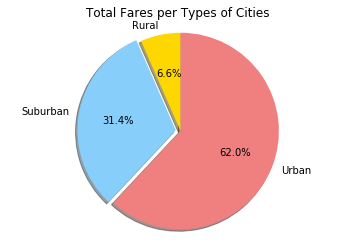

In [6]:
grouped_by_type = city_ride_df.groupby('type')

grouped_sum_by_type = grouped_by_type['sum'].sum()
grouped_sum_by_type = grouped_sum_by_type.reset_index()

#print(grouped_sum_by_type)
#print(grouped_by_type.head())

pie_labels = grouped_sum_by_type['type']
pie_data = grouped_sum_by_type['sum']

colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0, 0.05, 0)

plt.pie(pie_data, explode=explode, labels=pie_labels, colors=colors,autopct="{:.1f}%".format, shadow=True, startangle=90)
plt.axis("equal")

plt.title("Total Fares per Types of Cities")

plt.show()

## % of Total Rides by City Type

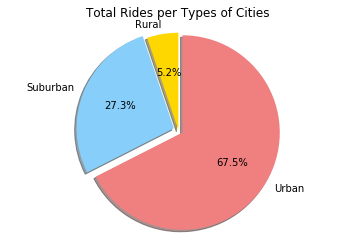

In [7]:
grouped_rides_by_type = grouped_by_type['count'].sum()
grouped_rides_by_type = grouped_rides_by_type.reset_index()

pie_labels = grouped_rides_by_type['type']
pie_data = grouped_rides_by_type['count']

colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0,0.05,0.05)

plt.pie(pie_data, explode=explode, labels=pie_labels, colors=colors,autopct="{:.1f}%".format, shadow=True, startangle=90)
plt.axis("equal")

plt.title("Total Rides per Types of Cities")

plt.show()

## % of Total Drivers by City Type

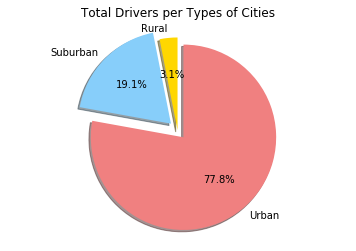

In [8]:
grouped_drivers_by_type = grouped_by_type['driver_count'].sum()
grouped_drivers_by_type = grouped_drivers_by_type.reset_index()

pie_labels = grouped_drivers_by_type['type']
pie_data = grouped_drivers_by_type['driver_count']

colors = ["Gold", "lightskyblue", "lightcoral"]
explode = (0, 0.1, 0.1)

plt.pie(pie_data, explode=explode, labels=pie_labels, colors=colors,autopct="{:.1f}%".format, shadow=True, startangle=90)
plt.axis("equal")

plt.title("Total Drivers per Types of Cities")

plt.show()